# Marginal, Joint, and Conditional Probability Venn Diagrams

This notebook creates two events, and calculates the marginal, joint, and conditional probabilities of both events from random samples in the feature space. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

First let's create some `x` and `y` sample points from 0 to 10. Next we define two areas that make up `Event A` and `Event B` with a random location and random size

In [2]:
number_of_samples = 100
x = np.random.rand(number_of_samples) + np.random.randint(
    0, 10, number_of_samples
)
y = np.random.rand(number_of_samples) + np.random.randint(
    0, 10, number_of_samples
)
event_a_radius = np.random.randint(1, 5)
event_a_center = np.random.randint(event_a_radius, 10 - event_a_radius, 2)
event_b_radius = np.random.randint(1, 5)
event_b_center = np.random.randint(event_b_radius, 10 - event_b_radius, 2)

Next, we walk through each sample point and count if it is part of `Event A`, `Event B`, and A intersection B, $A \cap B$.

In [3]:
a_count = 0
b_count = 0
joint_count = 0
for i in enumerate(x):
    # count samples in event a
    if (
        np.sqrt(
            (x[i[0]] - event_a_center[0]) ** 2
            + (y[i[0]] - event_a_center[1]) ** 2
        )
        <= event_a_radius
    ):
        a_count += 1
    # count samples in event b
    if (
        np.sqrt(
            (x[i[0]] - event_b_center[0]) ** 2
            + (y[i[0]] - event_b_center[1]) ** 2
        )
        <= event_b_radius
    ):
        b_count += 1
    # count samples in the intersection of a and b
    if (
        np.sqrt(
            (x[i[0]] - event_a_center[0]) ** 2
            + (y[i[0]] - event_a_center[1]) ** 2
        )
        <= event_a_radius
        and np.sqrt(
            (x[i[0]] - event_b_center[0]) ** 2
            + (y[i[0]] - event_b_center[1]) ** 2
        )
        <= event_b_radius
    ):
        joint_count += 1
# calculate the marginal probabilities
Prob_a = a_count / len(x)
Prob_b = b_count / len(x)
# calculate the joint probabilities
Joint_prob = joint_count / len(x)
# calculate the conditional probabilities
A_given_B = Joint_prob / Prob_b
B_given_A = Joint_prob / Prob_a

Print out the marginal and conditional probabilities for `Event A` and `Event B`

In [4]:
print(
    "The probability of Event A is %s, and the probability of Event A given Event B is %s"
    % (Prob_a, np.round(A_given_B, 2))
)
print(
    "The probability of Event B is %s, and the probability of Event B given Event A is %s"
    % (Prob_b, np.round(B_given_A, 2))
)

The probability of Event A is 0.36, and the probability of Event A given Event B is 0.76
The probability of Event B is 0.33, and the probability of Event B given Event A is 0.69


Print out the joint probability of the two events, and the product of both events to document if they are independent

In [5]:
print(
    "The joint probability is %s and the probability of Event A times the probability of Event B is %s. Are the events independent?"
    % (Joint_prob, np.round(Prob_a * Prob_b, 2))
)

The joint probability is 0.25 and the probability of Event A times the probability of Event B is 0.12. Are the events independent?


If the joint probability ($A \cap B )$ is not equal to the product of the marginal probabilites ($P(A)*P(B)$) then they are not independent

Lastly, let's plot up our events in our sample space and see how they are related with Venn diagrams.

(0, 10)

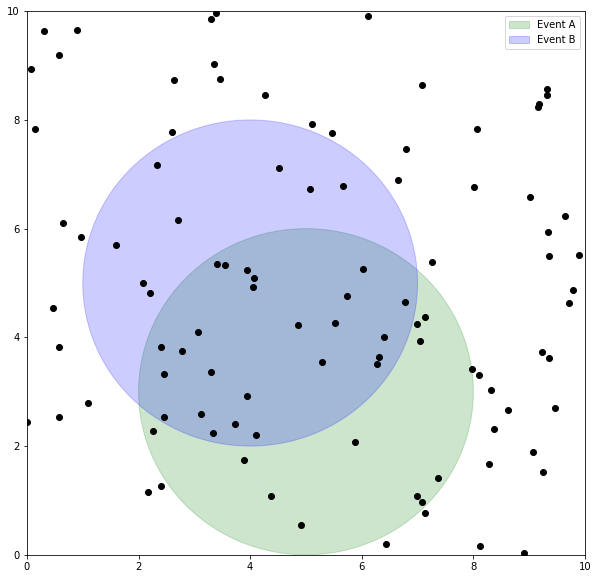

In [6]:
event_a = plt.Circle(
    event_a_center, event_a_radius, fc="g", ec="g", zorder=0, alpha=0.2
)
event_b = plt.Circle(
    event_b_center, event_b_radius, fc="b", ec="b", zorder=0, alpha=0.2
)
fig, ax = plt.subplots(figsize=(10, 10))
ax.add_patch(event_a)
ax.add_patch(event_b)
ax.legend([event_a, event_b], ["Event A", "Event B"])
plt.scatter(x, y, c="k", label="Sample")
plt.xlim(0, 10)
plt.ylim(0, 10)